# Problem Statement 1: ANOVA Case Study

A research laboratory was developing a new compound for the relief of severe cases of hay fever. In an experiment with 36 volunteers, the amounts of the two active ingredients (A & B) in the compound were varied at three levels each. Randomization was used in assigning four volunteers to each of the nine treatments. The data on hours of relief can be found in the following .csv file: Fever.csv

[Assume all of the ANOVA assumptions are satisfied]


In [1]:
# Load Required Libraries/Packages
import os
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [2]:
# Load Dataset and view top 5 Observations;
fever_df = pd.read_csv("Fever-1.csv")
fever_df.head()

,A,B,Volunteer,Relief
0,1,1,1,2.4
1,1,1,2,2.7
2,1,1,3,2.3
3,1,1,4,2.5
4,1,2,1,4.6


In [3]:
#Check info of the Dataframe
fever_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


**Check Frequency of Variable 'A'**

In [4]:
fever_df.A.value_counts()

3    12
2    12
1    12
Name: A, dtype: int64

**Check Frequency of Variable 'B'**

In [5]:
fever_df.B.value_counts()

3    12
2    12
1    12
Name: B, dtype: int64

In [6]:
# Check summary by grouping Variable A
fever_df['Relief'].groupby(by=fever_df['A']).describe()

,count,mean,std,min,25%,50%,75%,max
A,,,,,,,,
1,12.0,3.883333,1.059016,2.3,2.650,4.45,4.625,4.9
2,12.0,7.833333,1.777298,5.2,5.725,8.80,9.100,9.4
3,12.0,9.833333,3.127977,5.7,6.175,10.30,13.050,13.5


In [7]:
# Check summary by grouping Variable B
fever_df['Relief'].groupby(by=fever_df['B']).describe()

,count,mean,std,min,25%,50%,75%,max
B,,,,,,,,
1,12.0,4.633333,1.622195,2.3,2.65,5.40,5.825,6.2
2,12.0,7.933333,2.540341,4.2,4.85,8.95,9.950,10.6
3,12.0,8.983333,3.706710,4.4,4.75,9.20,13.050,13.5


In [8]:
# Convert variable'A' datatype from int64 to categorical variable
fever_df['A'] = pd.Categorical(fever_df['A'])
fever_df['A'].value_counts()

3    12
2    12
1    12
Name: A, dtype: int64

In [9]:
# Convert variable'B' datatype from int64 to categorical variable
fever_df['B'] = pd.Categorical(fever_df['B'])
fever_df['B'].value_counts()

3    12
2    12
1    12
Name: B, dtype: int64

#### 1.2	Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [10]:
# Get anova table:
# Ordinary Least Squares (OLS) model
formula = 'Relief ~ C(A)'
model = ols(formula,fever_df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


* **P-value obtained from ANOVA table is less than the level of significance Alpha, α = 0.05.**
* **Since P-value is less than Alpha; reject the null hypothesis, and therefore, we can conclude that the mean hours of relief for individual variable ‘A’ at 3 different levels are significantly different.**


#### 1.3	Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [11]:
# Get anova table:
# Ordinary Least Squares (OLS) model
formula = 'Relief ~ C(B)'
model = ols(formula,fever_df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


* **P-value obtained from ANOVA table is less than the level of significance Alpha, α = 0.05.**
* **Since P-value is less than Alpha; reject the null hypothesis, and therefore, we can conclude that the mean hours of relief for individual variable ‘B’ at 3 different levels are significantly different.**

#### 1.4	Analyse the effects of one variable on another with the help of an interaction plot. What is the interaction between the two treatments?
[Hint: use the ‘point plot’ function from the ‘seaborn’ function]

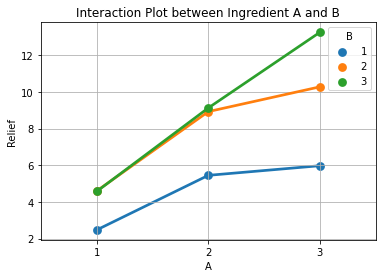

In [12]:
sns.pointplot(x = 'A', y = 'Relief',hue='B',data=fever_df,ci=None)
plt.title('Interaction Plot between Ingredient A and B')
plt.grid()
plt.show()

#### 1.5	Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’ along with their interaction 'A*B') with the variable 'Relief' and state your results.

**State the Null and Alternate Hypothesis**

**Null hypothesis $H_0$: There is no interaction between the levels of ingredient A and ingredient B.**

**Alternate Hypothesis $H_1$:There is an interaction between the levels of ingredient A and ingredient B.**

In [13]:
# Get anova table:
# Ordinary Least Squares (OLS) model
formula = 'Relief ~ C(A) + C(B) + C(A):C(B)'
model = ols(formula,fever_df).fit()
aov_table = anova_lm(model)
print(aov_table)

             df   sum_sq     mean_sq            F        PR(>F)
C(A)        2.0  220.020  110.010000  1827.858462  1.514043e-29
C(B)        2.0  123.660   61.830000  1027.329231  3.348751e-26
C(A):C(B)   4.0   29.425    7.356250   122.226923  6.972083e-17
Residual   27.0    1.625    0.060185          NaN           NaN


* **P-value obtained for interaction between ingredient 'A' and 'B' [C(A):C(B)] from ANOVA table is less than the level of significance Alpha, α = 0.05.**
* **Since P-value is less than Alpha; reject the null hypothesis, and therefore, we can conclude that there is an interaction between the ingredients 'A' and 'B'.**  

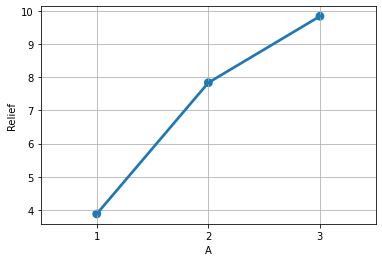

In [14]:
sns.pointplot(x = 'A', y = 'Relief',data=fever_df,ci=None)
plt.grid()
plt.show()

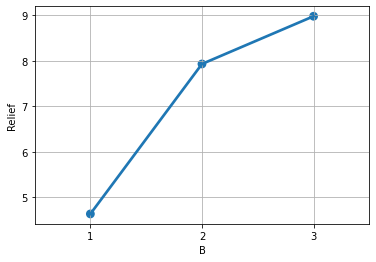

In [15]:
sns.pointplot(x = 'B', y = 'Relief',data=fever_df,ci=None)
plt.grid()
plt.show()